In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
full_mismatch_tsv = pd.read_csv("C:/Users/vik16/OneDrive/Documents/FOGS Summer 2022/STRaitRazor/results/" +\
                             "alleles/full_mismatch_STRait_razor_alleles_0.15_flank10.tsv",sep="\t")
pd.options.display.max_colwidth = 100
full_mismatch_tsv = full_mismatch_tsv.reindex(sorted(full_mismatch_tsv.columns), axis=1)

In [4]:
for i in range(0, full_mismatch_tsv.shape[0]):
    print("Primer:",full_mismatch_tsv.loc[i,"Primer"])
    print("Sample:",full_mismatch_tsv.loc[i,"Sample"])
    print("Allele 1 Excel",full_mismatch_tsv.loc[i,"Allele 1 E"])
    print("Allele 1 STRait",full_mismatch_tsv.loc[i,"Allele 1 S"])
    print("")
    print("Allele 2 Excel",full_mismatch_tsv.loc[i,"Allele 2 E"])
    print("Allele 2 STRait",full_mismatch_tsv.loc[i,"Allele 2 S"])
    print("******************************************************************************")

Primer: 4
Sample: 217
Allele 1 Excel TCCATCCATCCATCCATCCATCCATCCATCCATTCATCCATCCATCCATCCATCCATCCATCCA
Allele 1 STRait TCCATCCATCCATCCATCCATCCATCCATCCATCCATCCATCCATCCATCCATCCA

Allele 2 Excel TCCATCCATCCATCCATCCATCCATCCATCCATTCATCCATCCATCCATCCATCCATCCATCCA
Allele 2 STRait TCCATCCATCCATCCATCCATCCATTCATCCATCCATCCATCCATCCATCCATCCA
******************************************************************************
Primer: 8
Sample: 217
Allele 1 Excel CACGCACTCACTCACTCACTCACTCACTCACTCACTCACTCACTCACTCACTCACTCACTCACTCACTCACTCAC
Allele 1 STRait CACTCACTCACTCACTCACTCACTCACTCACTCACTCACTCACTCACTCACTCACTCACTCACTCACTCAC

Allele 2 Excel CACGCACTCACTCACTCACTCACTCACTCACTCACTCACTCACTCACTCACTCACTCACTCACTCACTCACTCAC
Allele 2 STRait CACTCACTCACTCACTCACTCACTCACTCACTCACTCACTCACTCACTCACTCACTCACTCACTCACTCAC
******************************************************************************
Primer: 20
Sample: 217
Allele 1 Excel TCCATCCATCCATCCATCCATCCATCCATCCATCCATCCATCCATCCATCCATCCATCCATCCATC
Allele 1 STRait TCCATCCATCC

In [6]:
#Repeat for the single mismatches
single_mismatch_tsv = pd.read_csv("C:/Users/vik16/OneDrive/Documents/FOGS Summer 2022/STRaitRazor/results/alleles/" +\
                             "single_mismatch_STRait_razor_alleles_0.15_flank10.tsv",sep="\t")
pd.options.display.max_colwidth = 100
single_mismatch_tsv = single_mismatch_tsv.reindex(sorted(single_mismatch_tsv.columns), axis=1)

In [7]:
for i in range(0, single_mismatch_tsv.shape[0]):
    print("Primer:",single_mismatch_tsv.loc[i,"Primer"])
    print("Sample:",single_mismatch_tsv.loc[i,"Sample"])
    print("Allele 1 Excel",single_mismatch_tsv.loc[i,"Allele 1 E"])
    print("Allele 1 STRait",single_mismatch_tsv.loc[i,"Allele 1 S"])
    print("")
    print("Allele 2 Excel",single_mismatch_tsv.loc[i,"Allele 2 E"])
    print("Allele 2 STRait",single_mismatch_tsv.loc[i,"Allele 2 S"])
    print("******************************************************************************")
    


Primer: 17
Sample: 217
Allele 1 Excel GAATGAATGAATGAATGAATGAATGAATGAATGAATGAATGAATGAATGAATGAATGA
Allele 1 STRait GAATGAATGAATGAATGAATGAATGAATGAATGAATGAATGAATGAATGAATGAATGA

Allele 2 Excel GAATGAATGAATGAATGAATGAATGAATGAATGAATGAATGAATGAATGAATGAATGAATGAATGAATGGA
Allele 2 STRait GAATGAATGAATGAATGAATGAATGAATGAATGAATGAATGAATGAATGAATGAATGA
******************************************************************************
Primer: 4
Sample: 1232
Allele 1 Excel TCCATCCATCCATCCATCCATCCATCCATCCATCCATCCATCCATCCATCCATCCATCCA
Allele 1 STRait TCCATCCATCCATCCATCCATCCATCCATCCATCCATCCATCCATCCATCCATCCATCCA

Allele 2 Excel TCCATCCATCCATCCATCCATCCATCCATCCATCCATCCATCCATCCATCCATCCATCCATCCATCCATCCATCCA
Allele 2 STRait TCCATCCATCCATCCATCCATCCATCCATCCATCCATCCATCCATCCATCCATCCATCCA
******************************************************************************
Primer: 4
Sample: 1393
Allele 1 Excel TCCATCCATCCATCCATCCATCCATCCATCCATCCATCCATCCATCCATCCA
Allele 1 STRait TCCATCCATCCATCCATCCATCCATCCATCCATCCATCCATCCATCCATCCA



In [111]:

#Compute the number of copies off 
#Plot histogram
full_error_tsv = pd.concat([full_mismatch_tsv,single_mismatch_tsv],ignore_index=True)
full_error_tsv.reindex()

#Create boolean vectors representing whether a particular index of the merged error df has a copy number error in 
#a particular allele or not
allele_1_copy_number_error_boolean = [len(full_error_tsv.loc[i,"Allele 1 S"]) >= len(full_error_tsv.loc[i,"Allele 1 E"])+4 \
 or len(full_error_tsv.loc[i,"Allele 1 S"]) <= len(full_error_tsv.loc[i,"Allele 1 E"])-4 \
 for i in range(0,full_error_tsv.shape[0])]

allele_2_copy_number_error_boolean = [len(full_error_tsv.loc[i,"Allele 2 S"]) >= len(full_error_tsv.loc[i,"Allele 2 E"])+4 \
 or len(full_error_tsv.loc[i,"Allele 2 S"]) <= len(full_error_tsv.loc[i,"Allele 2 E"])-4 \
 for i in range(0,full_error_tsv.shape[0])]

#Compute the actual difference in the length of the STRait razor/actual alleles for copy number errors
all_base_pair_errors_allele_1 = [len(full_error_tsv.loc[i,"Allele 1 S"]) - len(full_error_tsv.loc[i,"Allele 1 E"])
 for i in range(0,full_error_tsv.shape[0]) if allele_1_copy_number_error_boolean[i]]

all_base_pair_errors_allele_2 = [len(full_error_tsv.loc[i,"Allele 2 S"]) - len(full_error_tsv.loc[i,"Allele 2 E"])
 for i in range(0,full_error_tsv.shape[0]) if allele_2_copy_number_error_boolean[i]]


In [112]:
#Combine the single and double mismatches into a table that only contains copy number mistakes
allele_1_errors=full_error_tsv.loc[allele_1_copy_number_error_boolean,["Primer","Sample"]]
allele_1_errors["Allele"]=[1]*allele_1_errors.shape[0]
allele_1_errors["BP Error"]=all_base_pair_errors_allele_1
allele_1_errors["Abs CN"]=[abs(entry)/4 for entry in all_base_pair_errors_allele_1]

allele_2_errors=full_error_tsv.loc[allele_2_copy_number_error_boolean,["Primer","Sample"]]
allele_2_errors["Allele"]=[2]*allele_2_errors.shape[0]
allele_2_errors["BP Error"]=all_base_pair_errors_allele_2
allele_2_errors["Abs CN"]=[abs(entry)/4 for entry in all_base_pair_errors_allele_2]

full_cn_errors_df = pd.concat([allele_1_errors,allele_2_errors],ignore_index=True)
full_cn_errors_df

,Primer,Sample,Allele,BP Error,Abs CN
0,4,217,1,-8,2.00
1,5,217,1,-10,2.50
2,8,217,1,-4,1.00
3,5,1232,1,-10,2.50
4,5,1393,1,-10,2.50
5,5,1791,1,-10,2.50
6,8,1791,1,-4,1.00
7,5,34896,1,-10,2.50
8,18,34896,1,8,2.00
9,5,34966,1,-10,2.50


Text(0, 0.5, 'Number of occurrences')

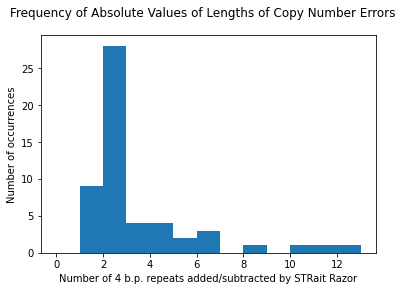

In [113]:
plt.hist(full_cn_errors_df["Abs CN"], bins=np.arange(0,14,1))
plt.suptitle("Frequency of Absolute Values of Lengths of Copy Number Errors")
plt.xlabel("Number of 4 b.p. repeats added/subtracted by STRait Razor")
plt.ylabel("Number of occurrences")

In [114]:
#Using the data frame created above and the visual results from the histogram,
#examine the primer/sample configurations that have particularly egregious CN errors (>=5)
full_cn_errors_df[full_cn_errors_df["Abs CN"]>=5]

,Primer,Sample,Allele,BP Error,Abs CN
16,10,1232,1,44,11.00
21,20,217,2,-20,5.00
22,25,217,2,-35,8.75
26,8,1791,2,-20,5.00
35,25,2006174,2,-27,6.75
40,25,2599208,2,-43,10.75
43,4,1393,2,-56,14.00
47,15,1791,2,-24,6.00
49,4,34966,2,-48,12.00
51,4,2006174,2,-24,6.00


## What's wrong with the primers/samples above?
* 10, 1232 - < 100 reads
* 20, 217 - < 200 reads
* 25, 217 - off-by-one, but also identified the shorter allele as the only significant allele, when the longer allele was also significant
* 8, 1791 - ??? there are enough reads, idk what happened here